This notebook performs exploratory data analysis (EDA) on a cleaned dataset combining train and test splits. The EDA aims to:

- Verify data quality and confirm the absence of missing values after preprocessing.
- Provide an initial overview of the data structure and sample records.
- Examine class imbalance in the target variable (`total_person_income`).
- Summarize statistics for numerical features to identify outliers, skewness, and sparsity.
- Visualize relationships between income and key numeric/categorical variables using boxplots, countplots, and crosstabs.
- Assess feature correlations, including point-biserial correlation between numeric features and income.
- Transform skewed financial variables with log scaling for better visualization.
- Estimate preliminary feature importance using a Random Forest model.

The purpose is to understand the dataset’s structure, detect potential issues, and identify patterns or relationships that may inform feature engineering and model selection for downstream predictive tasks.

Import necessary packages, load cleaned data and create one dataframe

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("../data/processed/train_clean.csv")
test = pd.read_csv("../data/processed/test_clean.csv")

df = pd.concat([train, test], axis=0).reset_index(drop=True)

Matplotlib is building the font cache; this may take a moment.


Let see that there is no missing values anymore as excepted past the preprocessing

Text(142.25, 0.5, 'Fraction of NaNs')

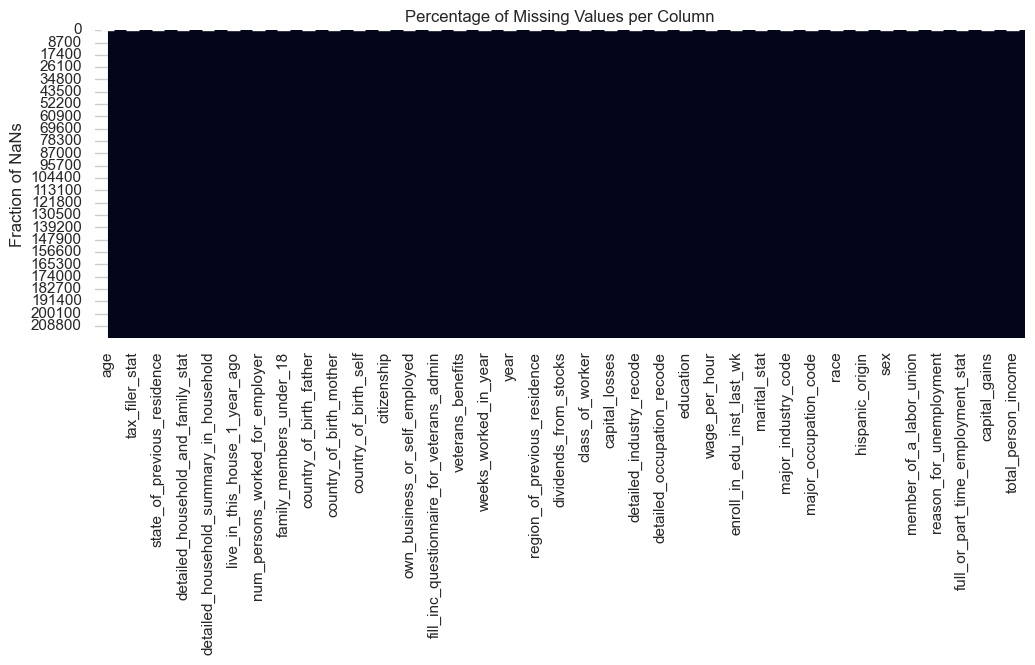

In [ ]:
plt.figure(figsize=(14,5))
sns.heatmap(df.isna(), cbar=False)
na_rate = df.isna().mean().sort_values(ascending=False)
na_rate[na_rate >= 0].plot(kind="bar", figsize=(12,4), color='salmon')
plt.title("Percentage of Missing Values per Column")
plt.ylabel("Fraction of NaNs")


Have a first glance at the data by looking at the first few rows

In [13]:
df.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,weeks_worked_in_year,year,total_person_income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


Class imbalance

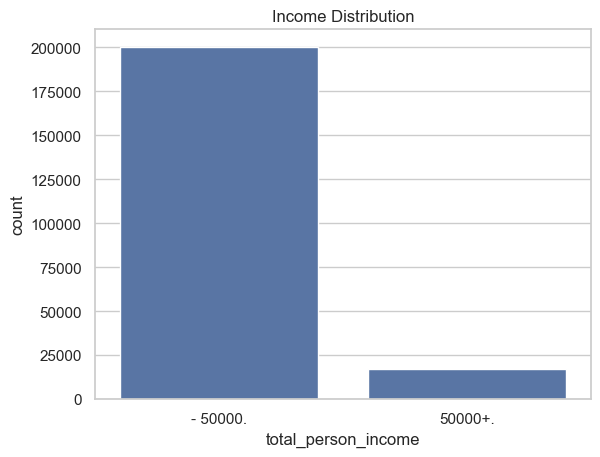

total_person_income
- 50000.    0.920373
50000+.     0.079627
Name: proportion, dtype: float64

In [17]:
sns.countplot(x="total_person_income", data=df)
plt.title("Income Distribution")
plt.show()

df["total_person_income"].value_counts(normalize=True)

Let us look at the statistics for the numerical columns

In [15]:
num_cols = [
    "age",
    "wage_per_hour",
    "capital_gains",
    "capital_losses",
    "dividends_from_stocks",
    "num_persons_worked_for_employer",
    "weeks_worked_in_year"
]

df[num_cols].describe()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,num_persons_worked_for_employer,weeks_worked_in_year
count,217489.000000,217489.000000,217489.000000,217489.000000,217489.000000,217489.000000,217489.000000
mean,39.423327,72.926084,551.130071,47.649950,246.943519,2.560672,30.304236
std,19.434228,311.502834,5246.098471,305.496793,2181.541502,2.403479,23.718906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,2.000000,46.000000
75%,52.000000,0.000000,0.000000,0.000000,0.000000,5.000000,52.000000
max,90.000000,9999.000000,99999.000000,4608.000000,99999.000000,6.000000,52.000000


Most numeric variables (like wage_per_hour, capital_gains, and dividends_from_stocks) have medians of 0 but extremely large maximums, suggesting a few high outliers drive up the mean.

Sparse income-related data — the 75th percentile for all financial variables is still 0, meaning the majority of individuals report no additional income beyond wages.

Weeks_worked_in_year caps at 52 with a median of 46, showing most people work close to a full year, while num_persons_worked_for_employer averages around 2–3, indicating small workplace sizes.

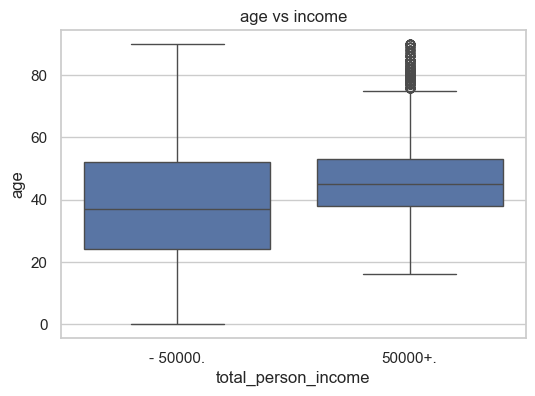

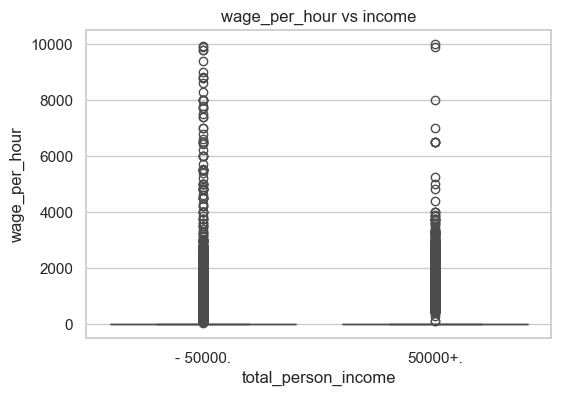

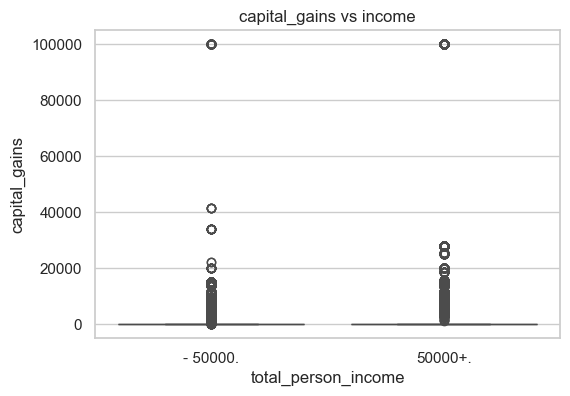

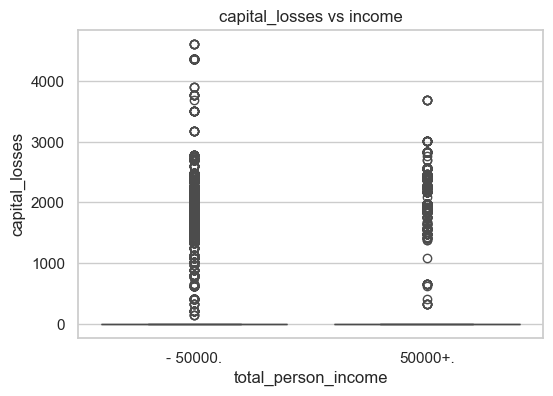

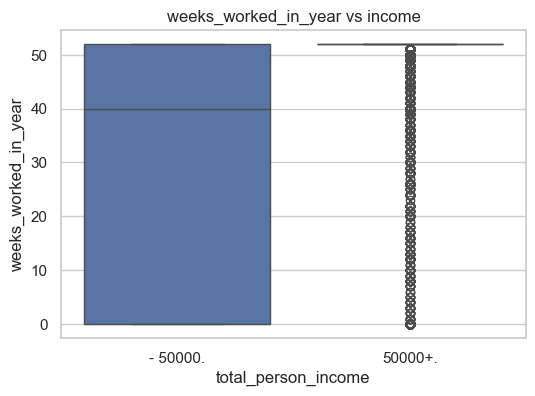

In [18]:
for col in ["age", "wage_per_hour", "capital_gains", "capital_losses", "weeks_worked_in_year"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="total_person_income", y=col, data=df)
    plt.title(f"{col} vs income")
    plt.show()


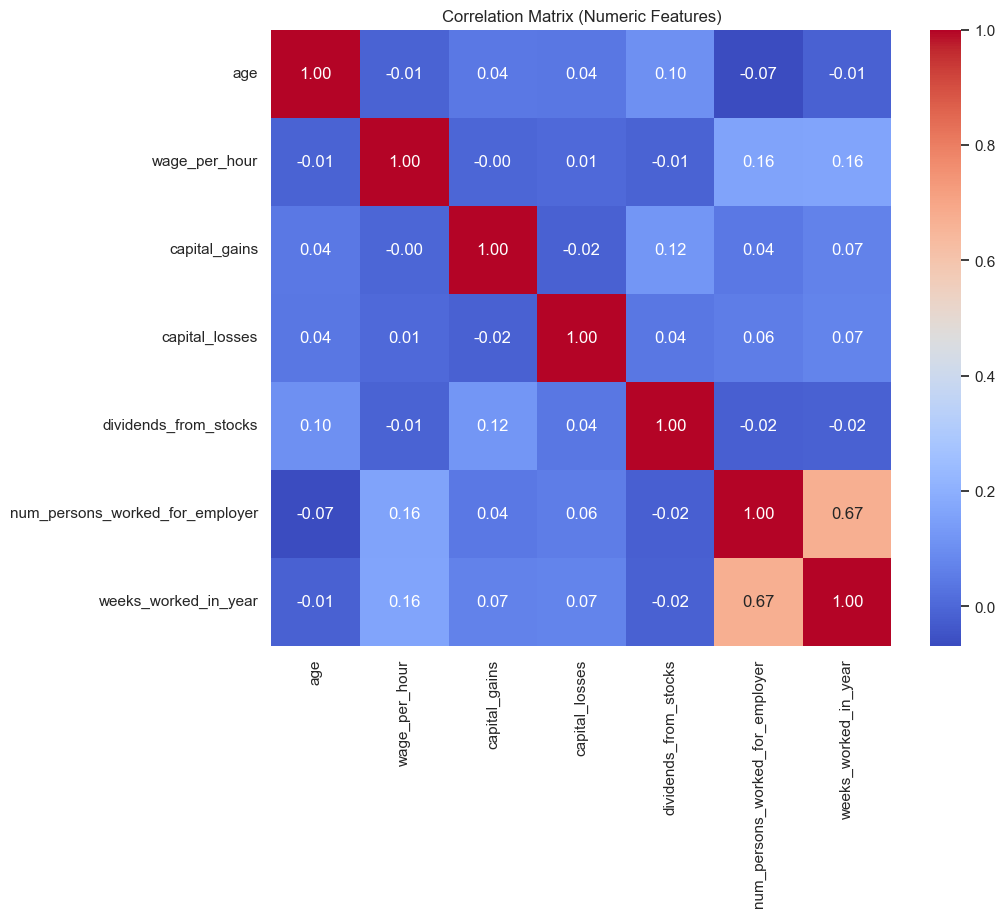

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Features)")
plt.show()


show actual correlation (e.g., Point-Biserial correlation) between each numeric variable and income:

In [22]:
from scipy.stats import pointbiserialr

y = df["total_person_income"].map(lambda s: 0 if "-" in s else 1)
corrs = {col: pointbiserialr(df[col], y)[0] for col in num_cols}
pd.Series(corrs).sort_values(ascending=False)


capital_gains                      0.235745
weeks_worked_in_year               0.223970
num_persons_worked_for_employer    0.183055
dividends_from_stocks              0.172946
capital_losses                     0.138550
age                                0.100997
wage_per_hour                      0.007555
dtype: float64

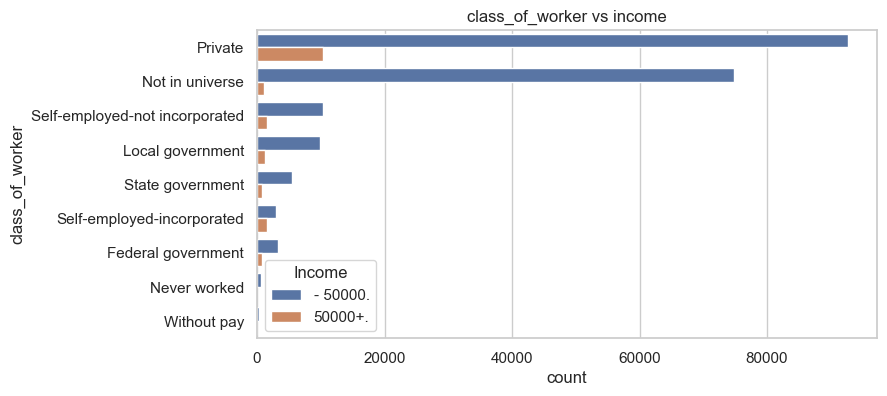

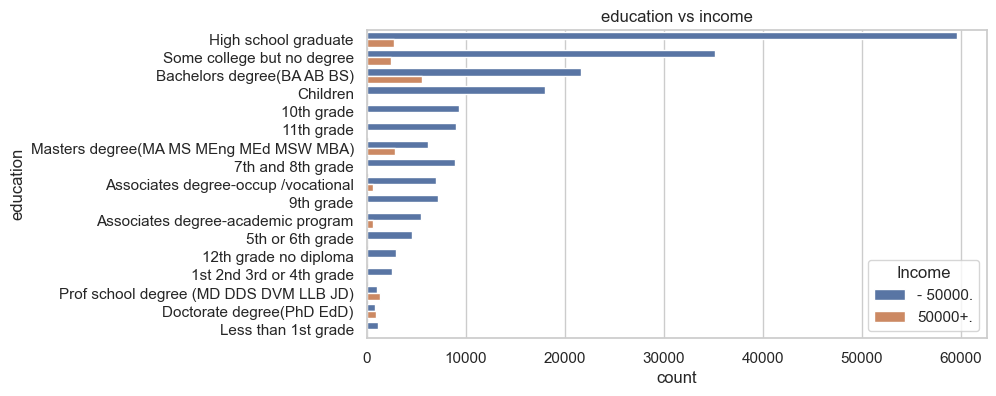

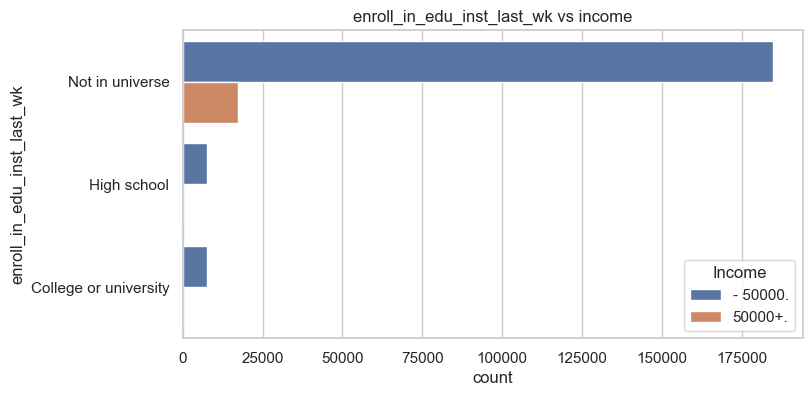

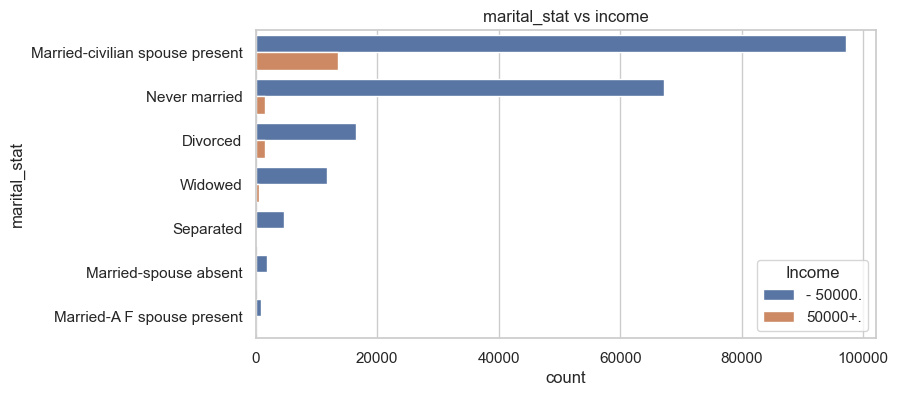

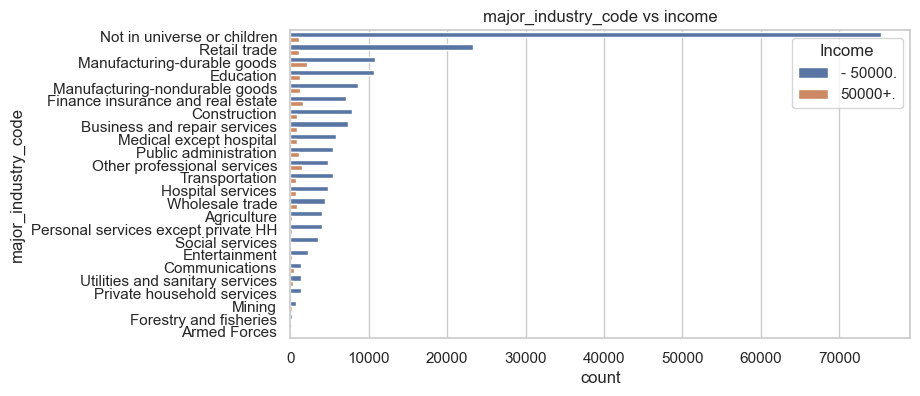

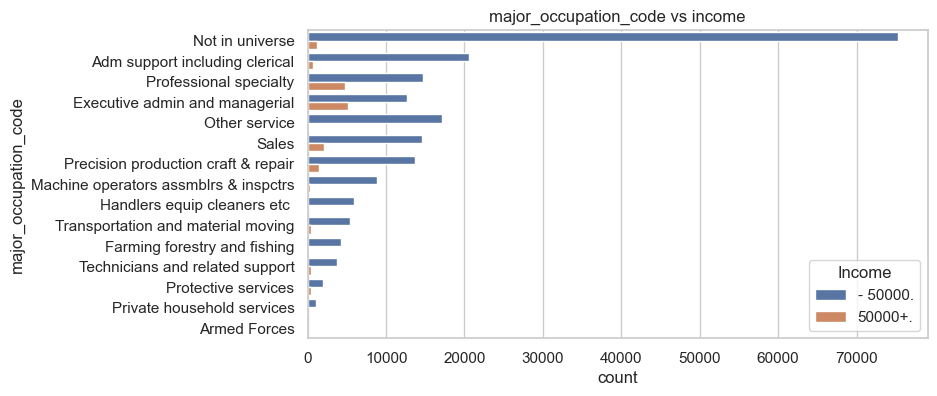

In [20]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
cat_cols.remove("total_person_income")

for col in cat_cols[:6]:  # just the first few for clarity
    plt.figure(figsize=(8,4))
    sns.countplot(y=col, hue="total_person_income", data=df, order=df[col].value_counts().index)
    plt.title(f"{col} vs income")
    plt.legend(title="Income")
    plt.show()


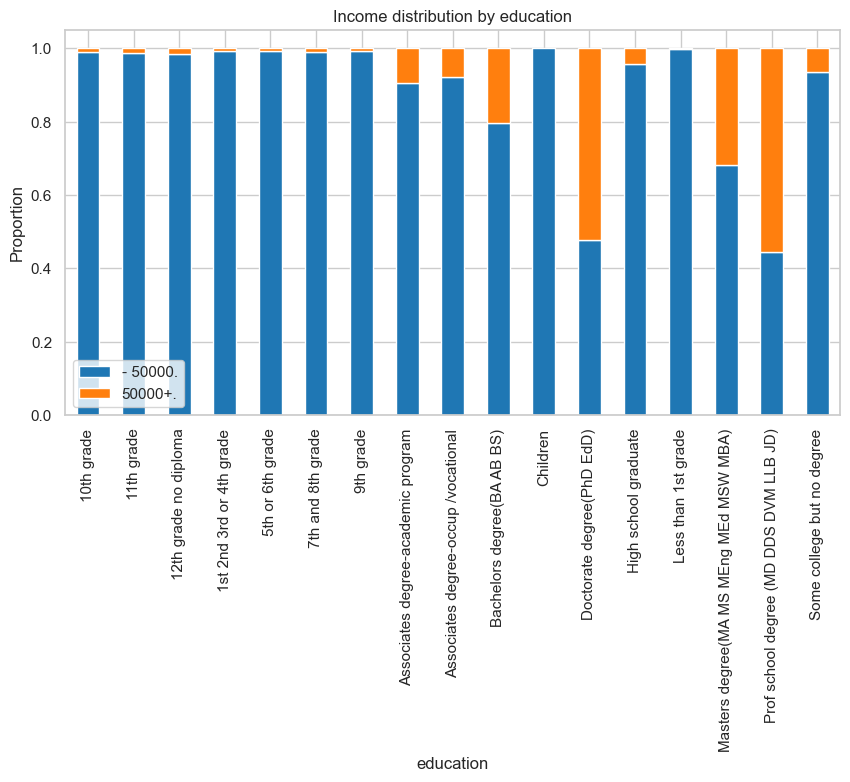

In [24]:
cat = "education"
pd.crosstab(df[cat], df["total_person_income"], normalize="index").plot(
    kind="bar", stacked=True, figsize=(10,5),
    color=["#1f77b4", "#ff7f0e"], label=["Under 50k", "Over 50k"]
)
plt.title(f"Income distribution by {cat}")
plt.ylabel("Proportion")
plt.legend()
plt.show()


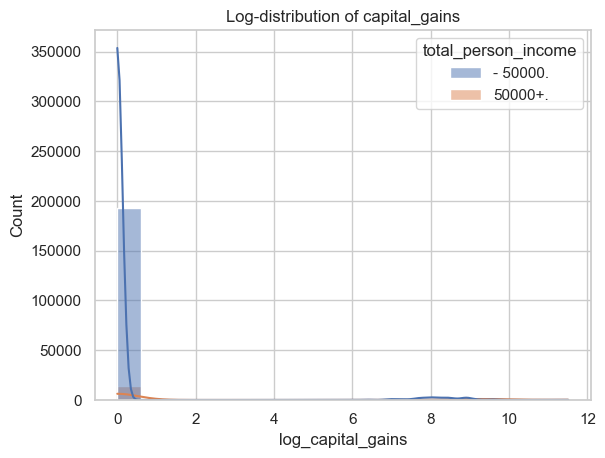

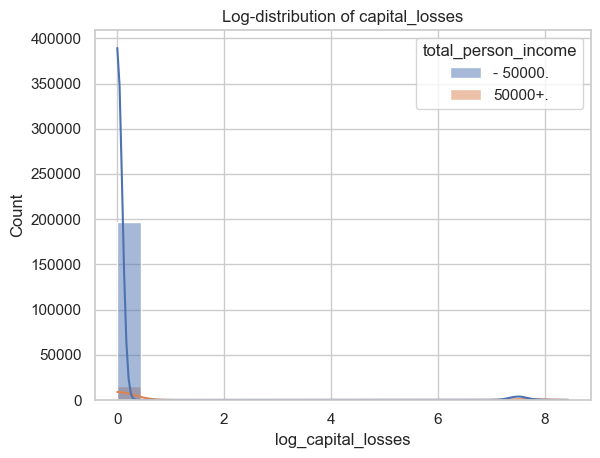

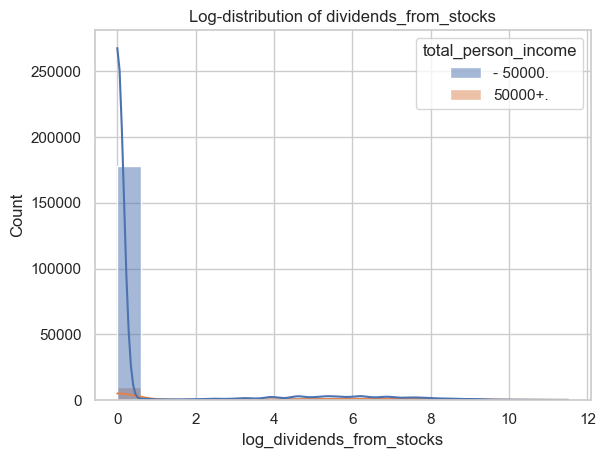

In [25]:
import numpy as np
for col in ["capital_gains", "capital_losses", "dividends_from_stocks"]:
    df[f"log_{col}"] = np.log1p(df[col])  # log(1+x)
    sns.histplot(df, x=f"log_{col}", hue="total_person_income", kde=True)
    plt.title(f"Log-distribution of {col}")
    plt.show()


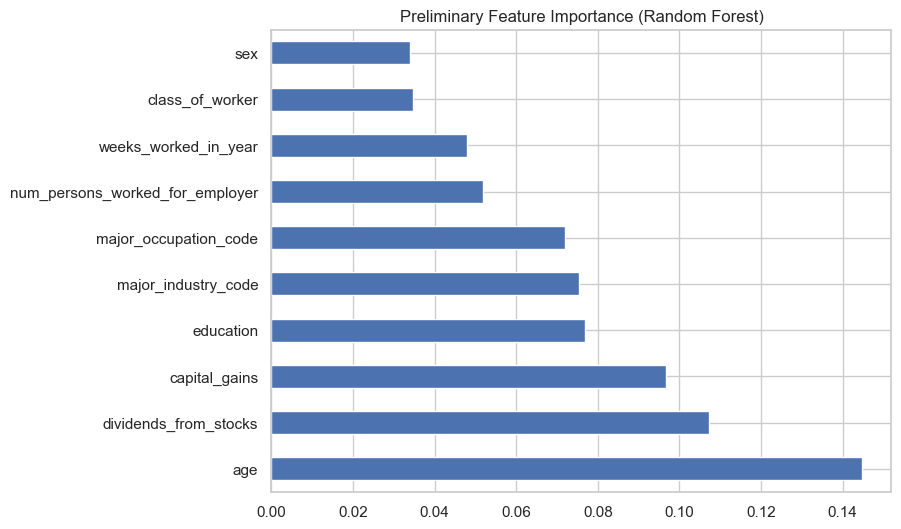

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder

X = OrdinalEncoder().fit_transform(df[cat_cols])
X = np.hstack([X, df[num_cols].fillna(0).values])
y = df["total_person_income"].map(lambda s: 0 if "-" in s else 1)

rf = RandomForestClassifier(random_state=0)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=cat_cols + num_cols)
importances.sort_values(ascending=False).head(10).plot(kind="barh", figsize=(8,6))
plt.title("Preliminary Feature Importance (Random Forest)")
plt.show()
